# 新しいセクション

# twuc5_6 データサイエンスIIA 第5-6回

データサイエンスIIA 第5-6回 演習用 jupyter note

自分のgoogle driveにコピーしてから利用してください。





## 1 参照スライド

参照スライド:
~~~
ocha_slides/slides/slide09.pptx
第9回判別分析
~~~
参照データ:

~~~
ocha_slides/data/data_for_slide08/soseki2.csv
ocha_slides/data/data_for_slide08/soseki_testdata.csv
~~~  





# 2 夏目漱石の文体変化

## 2.1 データの読み込み

In [ ]:
## データの読み込み

options(encoding = "shift-jis")
soseki2 <- read.csv( "soseki2.csv", head = TRUE, row.names = 1 )
soseki.test <- read.csv( "soseki_testdata.csv", head =TRUE, row.names = 1 )

## 2.2 新しい命令の意味


1. encoding

~~~
options(encoding = "shift-jis")
~~~
read.csv で読み込むファイルの文字コードのエンコードを shift-jis に設定します。文字情報のファイルにはたまに異なる文字コードでエンコードされたものがあり、それを読む場合はこのように文字コードを指定します。

最近では UTC-8 が標準になっていて、ほとんど必要ありません。

~~~
read.csv( "soseki2.csv", head = TRUE, row.names = 1 )
~~~

csv ファイルを読み込みます。このとき head = TRUE, row.names = 1と指定することで、一行目の内容を、桁の名前として読み込みます。
結果はデータフレームになります。




## 2.3 読み込んだデータフレームの確認

In [ ]:
print('------soseki2---------------')
head(soseki2)
print('------soseki.test-----------')
head(soseki.test)

## 2.4 回帰分析の実行とモデル選択

In [ ]:
soseki.mdl1 <- lm( 出版年 ~ ., data = soseki2 )
predict( soseki.mdl1, soseki.test )


琴のそら音   虞美人草     三四郎     こころ 
  1909.025   1907.046   1907.027   1912.816

実際の出版年は以下であった。予測はあっていましたか?

~~~
        	  出版年
琴のそら音	1905
虞美人草  	1907
三四郎    	1908
こころ    	1914

~~~

In [ ]:
soseki.mdl2 <- step( soseki.mdl1, trace = FALSE )
predict( soseki.mdl2, soseki.test )

琴のそら音   虞美人草     三四郎     こころ 
  1905.318   1905.944   1907.768   1912.824

予測は改善しましたか？なぜそうなったのでしょうか？

#3 線形判別分析

フィッシャーの線形判別分析

J= 群間分散/群内分散

を最大にするように判別関数をもとめ2群の平均の中点を通るよう決定境界を引く。

slide 7-10

## 3.1 iris データの準備

In [ ]:
data( iris )
d1 <- iris[ 1:100,  ]		# 1行目から100行目がsetosaとversicolorのデータ
d1$Species <- factor( d1$Species )	# カテゴリを再定義
# d1[,1] <- 10 - d1[,1]
head(d1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [ ]:
library( MASS )			# 線形判別分析の関数が含まれるパッケージの呼び出し
res.iris <- lda( Species ~ Sepal.Length + Sepal.Width, data = d1 )
res.iris

Call:
lda(Species ~ Sepal.Length + Sepal.Width, data = d1)

Prior probabilities of groups:
    setosa versicolor 
       0.5        0.5 

Group means:
           Sepal.Length Sepal.Width
setosa            5.006       3.428
versicolor        5.936       2.770

Coefficients of linear discriminants:
                   LD1
Sepal.Length  2.560968
Sepal.Width  -3.167079

In [ ]:
b <- -1 * apply( res.iris$mean %*% res.iris$scaling, 2, mean )
b


LD1 
-4.196279

In [ ]:
res.iris$mean


,Sepal.Length,Sepal.Width
setosa,5.006,3.428
versicolor,5.936,2.770


In [ ]:
res.iris$scaling


,LD1
Sepal.Length,2.560968
Sepal.Width,-3.167079


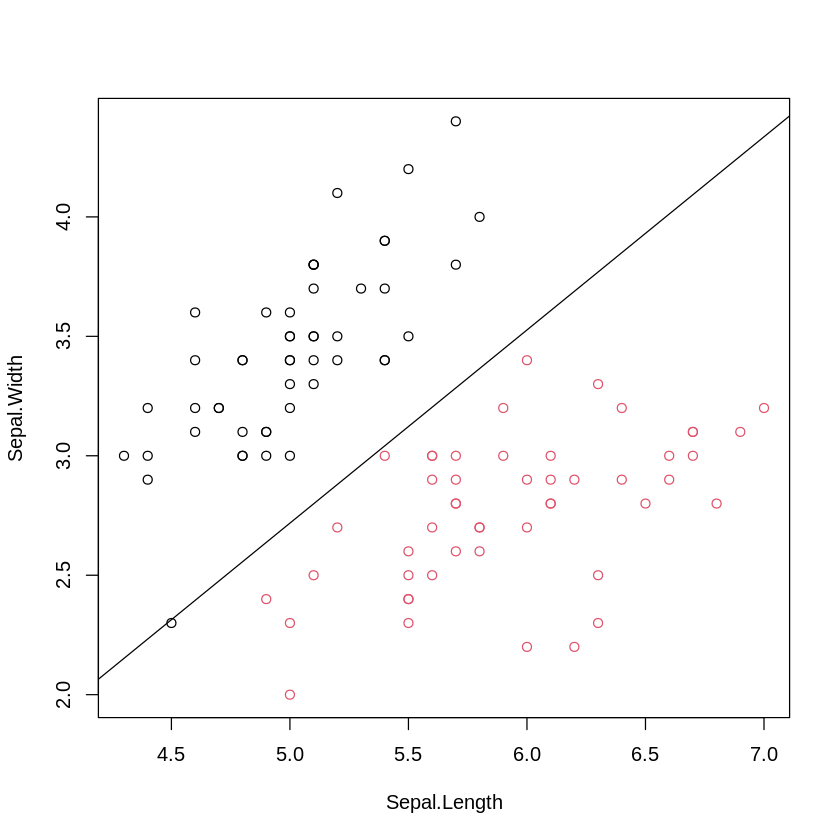

In [ ]:
plot( Sepal.Width ~ Sepal.Length, data = d1, col = unclass( d1$Species ) )
a1 <- res.iris$scaling[1, 1]
a2 <- res.iris$scaling[2, 1]
abline( -b/a2, -a1/a2 )

# 課題1

iris データの準備で以下の行をコメントアウトして、その後の計算を実行してみてください。

~~~
# d1[,1] <- 10 - d1[,1]
~~~
データはどのように変わって、グラフがどのように変わったかを以下に100文字程度で説明してください。

課題1回答

 (ここをダブルクリックして、テキストで記入してください)



## 例題2 誤判別率を求める


In [ ]:
# 判別モデルを用いて、カテゴリを予測する

res.iris <- lda( Species ~ Sepal.Length + Sepal.Width, data = d1 )
pred.iris <- predict( res.iris, d1 )$class


In [ ]:
#  混同行列を作成
tab.iris <- table( d1$Species, pred.iris )		# d1[, 5]でも可
tab.iris

            pred.iris
             setosa versicolor
  setosa         49          1
  versicolor      0         50

In [ ]:
1 - sum( diag(tab.iris) ) / sum(tab.iris)

[1] 0.01

### 交差検証

slide09 ページ18


交差検証（交差確認, Cross Validation）

> データを3つ以上に分割しモデルの評価を行う

>> k分割交差検証（k-Fold Cross Validation）

>> LOOCV（Leave-One-Out Cross Validation）

~~~
lda( グループの識別変数 ~ 変数, data=データ)

例
lda( Species ~ Sepal.Length + Sepal.Width, data = d1, CV = TRUE )

~~~
LOOCV 検証を行う場合
~~~
lda( グループの識別変数 ~ 変数, data=データ, CV=TRUE)
~~~

# 課題2

以下の未完成部分をうめてください。

In [ ]:
#  LOOCVを行う
cv.iris <- lda( ここを埋めてください , data = d1, CV = TRUE )


In [ ]:
#  LOOCVの結果を表示
cv.iris$class

In [ ]:
#  LOOCVの結果を集計して混同行列を作成
cv.tab <- table( d1$Species, cv.iris$class )
cv.tab


            
             setosa versicolor
  setosa         49          1
  versicolor      0         50

In [ ]:
#  誤判別率の計算
1 - sum( diag(cv.tab) ) / sum(cv.tab)


[1] 0.01

## 分散が大きく違う2群を判別するとき

page 21

マハラノビス距離 - 分散を考慮した距離

## 例題 4


In [ ]:
a <- seq( 5, 100, by = 5 )
d1 <- iris[ 1:100,  ]		# 1行目から100行目がsetosaとversicolorのデータ
d1$Species <- factor( d1$Species )		# カテゴリを再定義
iris.train <- d1[ -a,  ]		# d1から5の倍数の行だけ除外
iris.test <- d1[ a,  ]		# d1から5の倍数の行だけ抽出


In [ ]:
#  訓練データを用いて、setosaとversicolorの平均を求める
s.mean <- apply( iris.train[1:40, -5], 2, mean )
v.mean <- apply( iris.train[41:80, -5], 2, mean )
#  訓練データを用いて、setosaとversicolorの分散を求める
s.var <- var( iris.train[1:40, -5] )
v.var <- var( iris.train[41:80, -5] )

# 課題3


slide09 ページ27を見て

例題4を実行するため、以下を完成してください

In [ ]:
# テストデータの判別を行う

Ds <- mahalanobis( )
Dv <- mahalanobis( )
res.mah <- 


In [ ]:
#  結果の加工
pred.mah <- 

#  混同行列の作成
table(  )	

#  混同行列の作成と誤判別率の計算


# 4 演習問題 (削除します)

こちらの演習問題は、現在banknoteがcran.ism.ac.jpのmclusに入っていないようなので、削除いたします。(2022/10/28 金子)

--- 以下元の設問


課題
スイス紙幣の偽札データの所在
パッケージmclustに含まれてる

~~~
#  パッケージをダウンロードするミラーサイトの指定
options( repos = "https://cran.ism.ac.jp" )
#  mclustをインストール
install.packages( "mclust", dependencies = TRUE )
#  データの呼び出し
data( banknote )
~~~


In [ ]:
# 回答欄 (このセルを編集して作成してください)
# 必要ならコードセルを追加してください。